## Задача:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность

**Вывод по полученным результатам**

Проведен анализ данных проката велосипедов в зависимости от погоды, сезона и дня недели

По полученным результатам наибольшее влияние на увеличение количества аренд оказывает рост температуры воздуха и летний сезон
а на уменьшее количества аренд влияет усиление ветра и ухудшение погоды


In [279]:
import numpy as np

from sklearn import preprocessing
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Чтение набора данных из файла

[ссылка на dataset](https://archive-beta.ics.uci.edu/ml/datasets/bike+sharing+dataset)
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [280]:
data = pd.read_csv('BikeSharingByDays.csv', delimiter=',')
data.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,0.433696,0.602917,0.162312,571,2570,3141
97,98,2011-04-08,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,1471
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455


Данных довольно много и я решил удалить некоторые по моему мнению малоинформативные столбцы

In [281]:
data = data.drop(columns = ['dteday'],axis = 1)
data = data.drop(columns = ['instant'],axis = 1)
data = data.drop(columns = ['yr'],axis = 1)
data = data.drop(columns = ['casual'],axis = 1)
data = data.drop(columns = ['registered'],axis = 1)
data = data.drop(columns = ['atemp'],axis = 1)

data.head(100)

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
95,2,4,0,3,1,1,0.390833,0.470833,0.263063,2808
96,2,4,0,4,1,1,0.437500,0.602917,0.162312,3141
97,2,4,0,5,1,2,0.335833,0.836250,0.226992,1471
98,2,4,0,6,0,2,0.342500,0.877500,0.133083,2455


Некоторые данные уже были нормализованы, решил привести их к первоначальному виду, по указзаным в описании к датасету формулам

In [282]:
# Эти данные уже были нормализованы перефожу их в первоначальный вид
data[["temp"]] = data[["temp"]].apply(lambda x: ((47*x) - 8))
data[["hum"]] = data[["hum"]].apply(lambda x: (x*100))
data[["windspeed"]] = data[["windspeed"]].apply(lambda x: (x*67))

data.head(1000)

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,6,0,2,8.175849,80.5833,10.749882,985
1,1,1,0,0,0,2,9.083466,69.6087,16.652113,801
2,1,1,0,1,1,1,1.229108,43.7273,16.636703,1349
3,1,1,0,2,1,1,1.400000,59.0435,10.739832,1562
4,1,1,0,3,1,1,2.666979,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,3.945849,65.2917,23.458911,2114
727,1,12,0,5,1,2,3.906651,59.0000,10.416557,3095
728,1,12,0,6,0,2,3.906651,75.2917,8.333661,1341
729,1,12,0,0,0,1,4.024151,48.3333,23.500518,1796


Нормализую данные в колонках по мин/макс [-1, 1]

In [283]:
data.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,62.789406,12.762576,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,14.242910,5.192357,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,0.000000,1.500244,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,52.000000,9.041650,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,62.666700,12.125325,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,73.020850,15.625371,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,97.250000,34.000021,8714.000000


In [284]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

d = scaler.fit_transform(data)

columnNames = data.columns
data_scaled = pd.DataFrame(d, columns=columnNames)
data_scaled.head(100)

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,-1.000000,-1.000000,-1.0,1.000000,-1.0,0.0,-0.289661,0.657240,-0.430788,-0.778417
1,-1.000000,-1.000000,-1.0,-1.000000,-1.0,0.0,-0.241536,0.431541,-0.067571,-0.820755
2,-1.000000,-1.000000,-1.0,-0.666667,1.0,-1.0,-0.658000,-0.100724,-0.068519,-0.694662
3,-1.000000,-1.000000,-1.0,-0.333333,1.0,-1.0,-0.648939,0.214262,-0.431406,-0.645651
4,-1.000000,-1.000000,-1.0,0.000000,1.0,-1.0,-0.581760,-0.101374,-0.321715,-0.636908
...,...,...,...,...,...,...,...,...,...,...
95,-0.333333,-0.454545,-1.0,0.000000,1.0,-1.0,-0.173365,-0.031706,-0.007687,-0.358951
96,-0.333333,-0.454545,-1.0,0.333333,1.0,-1.0,-0.057066,0.239932,-0.423094,-0.282329
97,-0.333333,-0.454545,-1.0,0.666667,1.0,0.0,-0.310430,0.719794,-0.156411,-0.666590
98,-0.333333,-0.454545,-1.0,1.000000,-1.0,0.0,-0.293815,0.804627,-0.543608,-0.440175


Поиск пропусков данных с помощью визуализации данных на тепловой карте
Пропусков не обнаружено

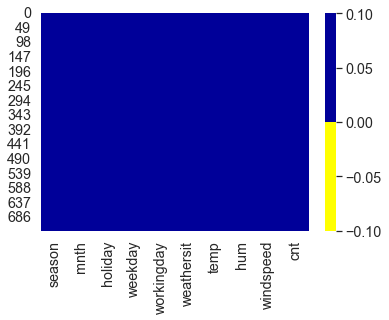

In [285]:
colours = ['#ffff00', '#000099']
sns.heatmap(data_scaled[columnNames].isnull(), cmap=sns.color_palette(colours));

In [286]:
for col in columnNames:
    pct_missing = np.mean(data_scaled[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

season - 0%
mnth - 0%
holiday - 0%
weekday - 0%
workingday - 0%
weathersit - 0%
temp - 0%
hum - 0%
windspeed - 0%
cnt - 0%


Анализ на нетипичные данные (выбросы)

<AxesSubplot:>

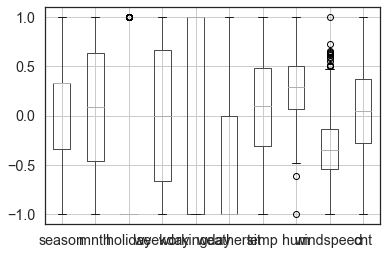

In [287]:
data_scaled.boxplot()

Больше всего выбросов для колонки 'windspeed', но их не очень много оставляю так

<AxesSubplot:>

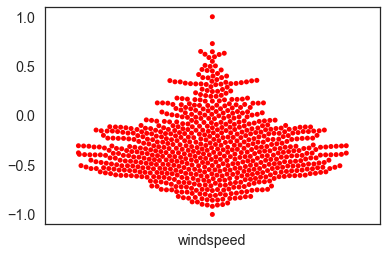

In [288]:
sns.swarmplot(data=data_scaled[['windspeed']], color="red")

Корреляция данных

In [289]:
corr_matrix = data_scaled.corr()
corr_matrix

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.205445,-0.229046,0.406100
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.222204,-0.207502,0.279977
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.015937,0.006292,-0.068348
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.052232,0.014282,0.067443
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.024327,-0.018796,0.061156
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,0.591045,0.039511,-0.297391
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.126963,-0.157944,0.627494
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.406100,0.279977,-0.068348,0.067443,0.061156,-0.297391,0.627494,-0.100659,-0.234545,1.000000


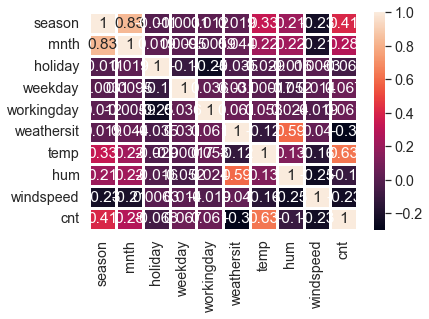

In [290]:
sns.heatmap(corr_matrix, annot=True, linewidths=3);

### Анализ данных на взаимосвязь
На возрастание целевого показателя cnt (количество клиентов) влияют следующие параметры в порядке убывания:
1. +0.63 temp (температуры)
2. +0.41 season (сезона)
3. +0.28 mnth (месяц), но он сильно зависит от season, поэтому я считаю что season предпочтительнее

На убывание целевого показателя cnt (количество клиентов) влияют следующие параметры в порядке убывания:
1. -0.3 weathersit (погода)
2. -0.23 windspeed (скорость ветра)

Остальные параметры не оказывают существенного влияния на количество клиентов проката

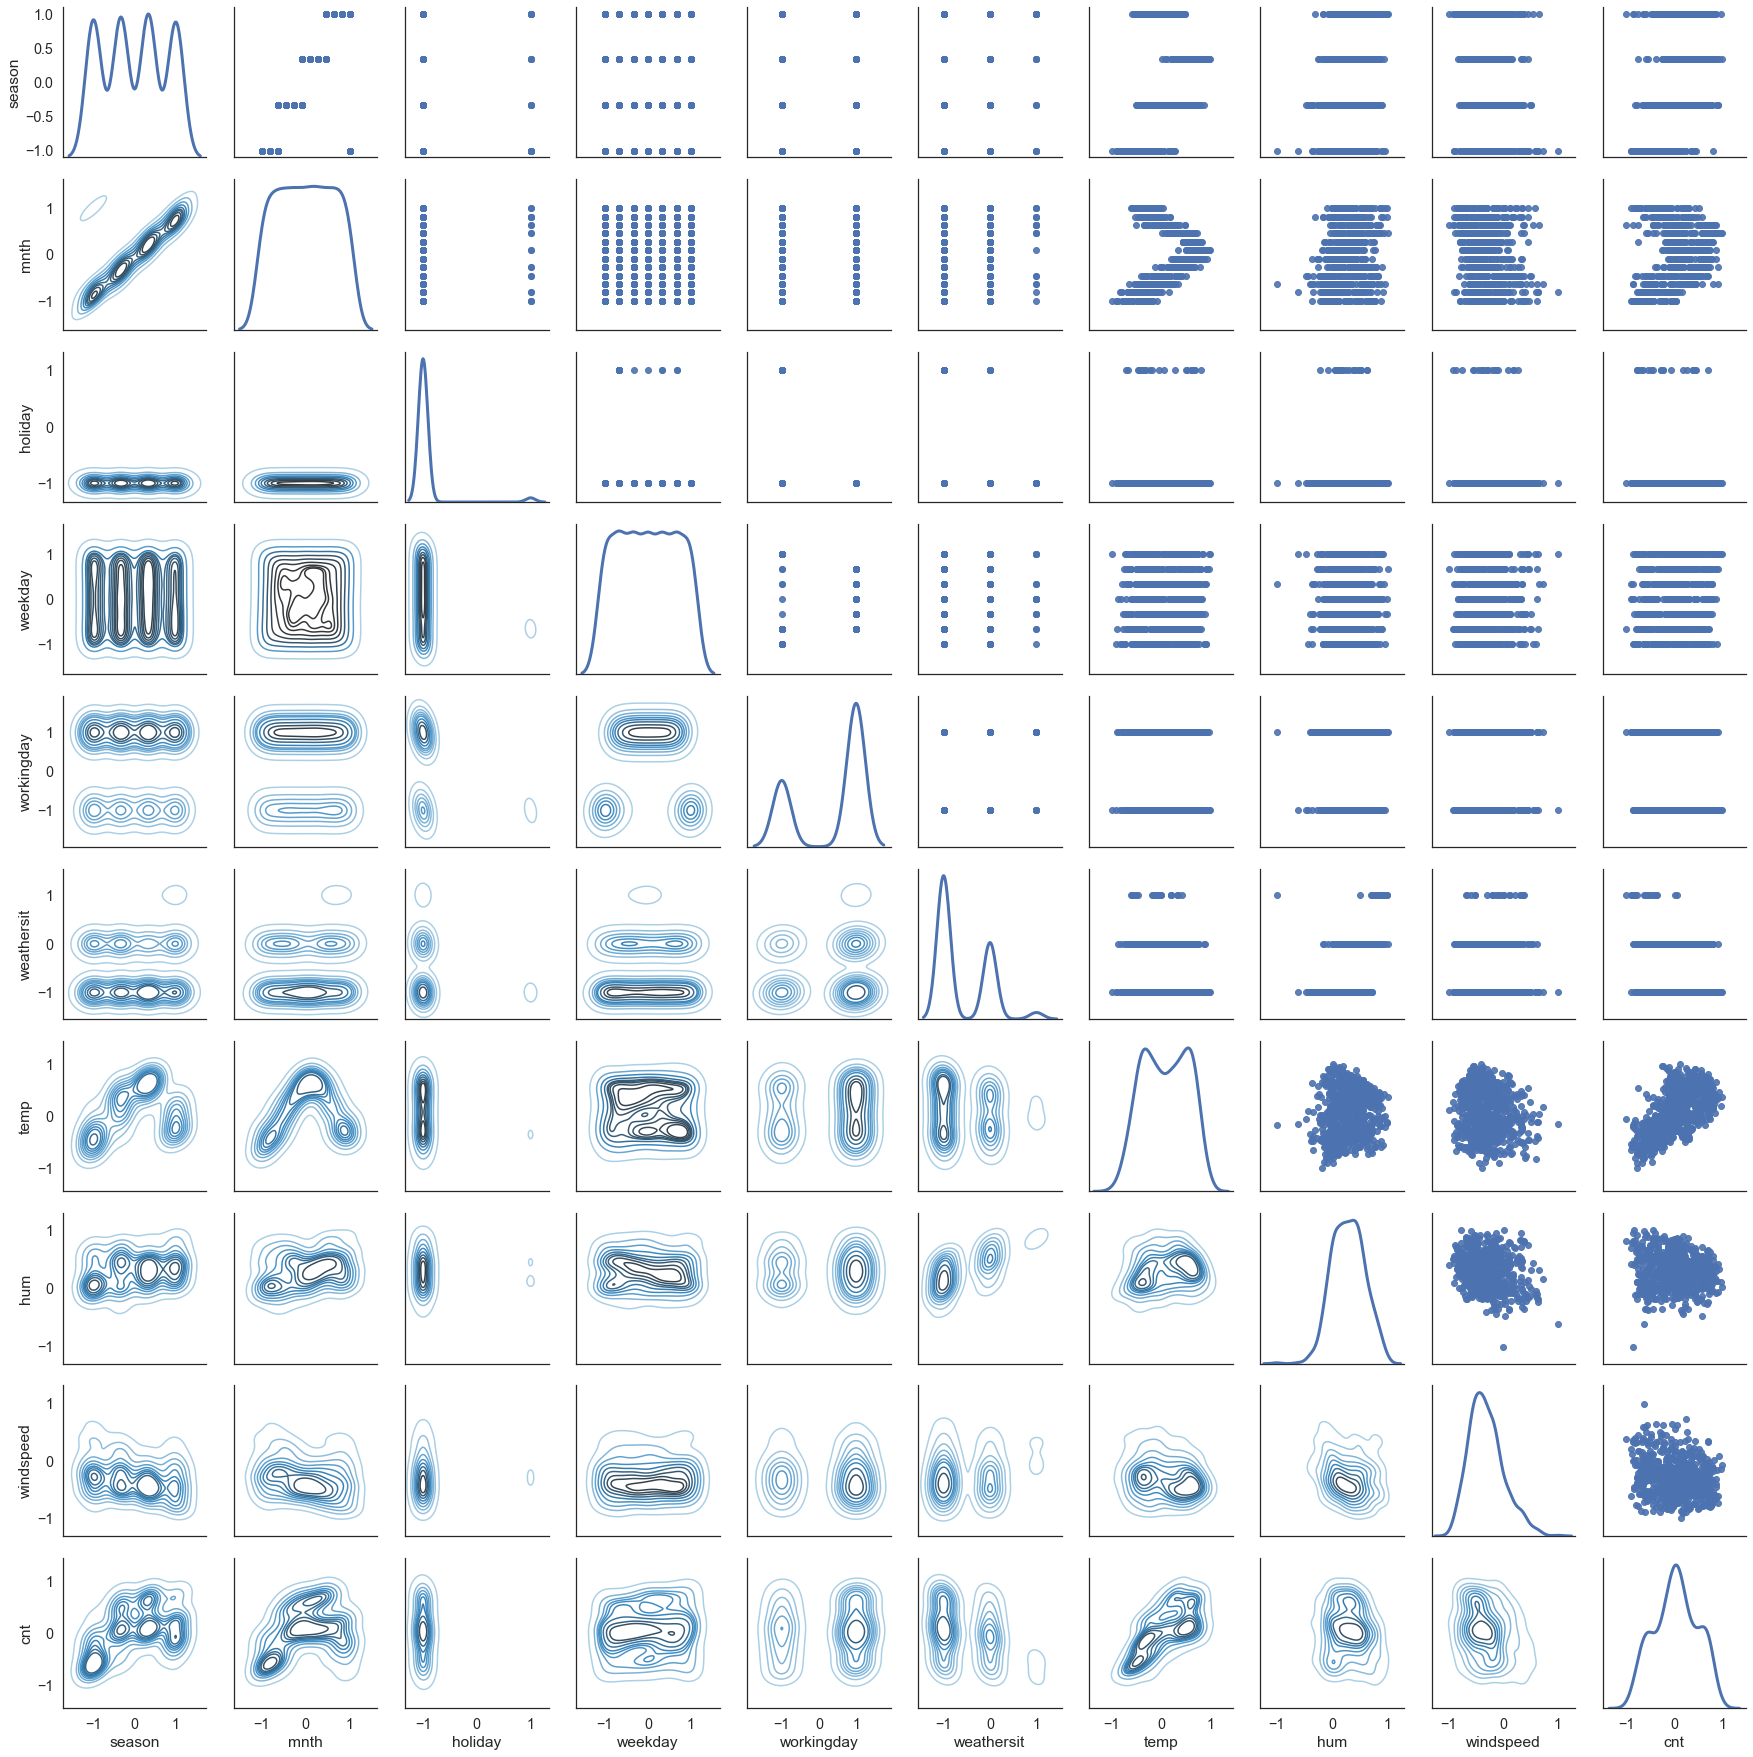

In [291]:
sns.set(style='white', font_scale=1.3)

g = sns.PairGrid(data_scaled, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.9)
g.map_diag(sns.kdeplot, lw=3);